# ---------------------------------------------------------------------------------------

# 1. Defining the Problem :-

> 1. The company has observed the reduction in revenue and we need to understand the factors resposible for it.

> 2. We need to analyze the factors resposible for yulu bicycles demand in a particular region.

> 3. We have a 'count' column depicting the total rental bikes, here we will find the relationship ie what all factors increased the rental bikes and on that basis we can give suggestions. 

> 4. After finding our all the factors/feeatures resposible for increasing the rental bikes, we can advise company to focus on those areas thus helping it to increase the revenue.



# ---------------------------------------------------------------------------------------

## Business Metric : Factors resposible for increasing rental bikes

# ---------------------------------------------------------------------------------------

## 1.1

In [80]:
# loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from seaborn_qqplot import pplot
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('yulu.csv')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
df.shape

(10886, 12)

In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.columns[df.isnull().any()]

Index([], dtype='object')

# ---------------------------------------------------------------------------------------

## Missing values !
There are no null values in our dataset

# ---------------------------------------------------------------------------------------

In [7]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

## Conversion following numerical columns into categories:-

> 1. 'season'

> 2. 'holiday'

> 3. 'workingday'

> 4. 'weather'

In [8]:
# converting object date to datetime
df['datetime']=pd.to_datetime(df['datetime'])

# season
df['season'].loc[df['season']==1] = 'spring'
df['season'].loc[df['season']==2] = 'summser'
df['season'].loc[df['season']==3] = 'fall'
df['season'].loc[df['season']==4] = 'winter'

# holiday
df['holiday'].loc[df['holiday']==0] = 'not_holiday'
df['holiday'].loc[df['holiday']==1] = 'holiday'

# working day
df['workingday'].loc[df['workingday']==1] = 'working'
df['workingday'].loc[df['workingday']==0] = 'not_working'

# weather
df['weather'].loc[df['weather']==1] = 'clear'
df['weather'].loc[df['weather']==2] = 'mist'
df['weather'].loc[df['weather']==3] = 'light_rain'
df['weather'].loc[df['weather']==4] = 'rain'

In [9]:
df.head()

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   
2 2011-01-01 02:00:00  spring  not_holiday  not_working   clear  9.02  13.635   
3 2011-01-01 03:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
4 2011-01-01 04:00:00  spring  not_holiday  not_working   clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Note: We converted all the above columns into categories from interger

## 1.2 Univariate Analysis :- 

In [11]:
df.head(2)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

### temp 

In [12]:
print('The mean of temp : ',np.round(df['temp'].mean()))
print('The median of temp : ',df['temp'].median())
print('The variance of temp : ',np.round(np.var(df['temp']),2))
print('The standard deviation of temp : ',np.round(np.std(df['temp']),2))

The mean of temp :  20.0
The median of temp :  20.5
The variance of temp :  60.7
The standard deviation of temp :  7.79


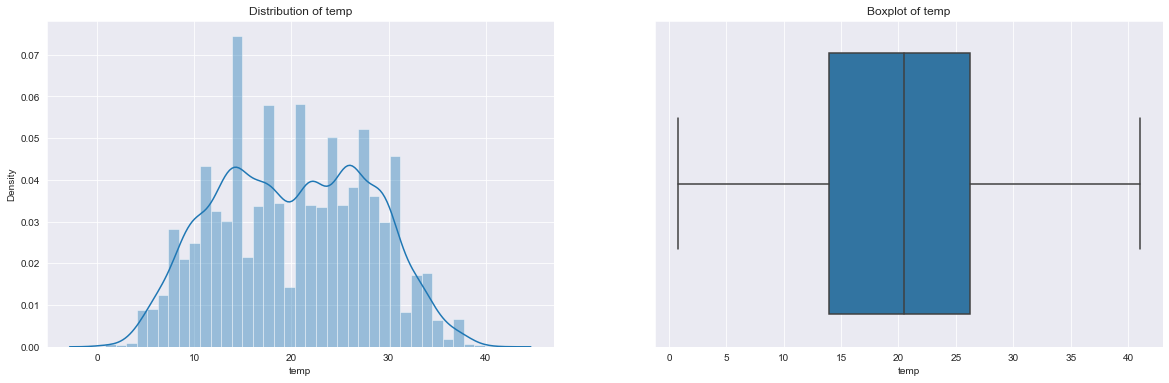

In [13]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['temp'],ax=axes[0]).set(title='Distribution of temp')
sns.boxplot(df['temp'],ax=axes[1]).set(title='Boxplot of temp')
plt.show()

### atemp : feeling temperature in celsius

In [14]:
print('The mean of atemp : ',np.round(df['atemp'].mean()))
print('The median of atemp : ',df['atemp'].median())
print('The variance of atemp : ',np.round(np.var(df['atemp']),2))
print('The standard deviation of atemp : ',np.round(np.std(df['atemp']),2))

The mean of atemp :  24.0
The median of atemp :  24.24
The variance of atemp :  71.81
The standard deviation of atemp :  8.47


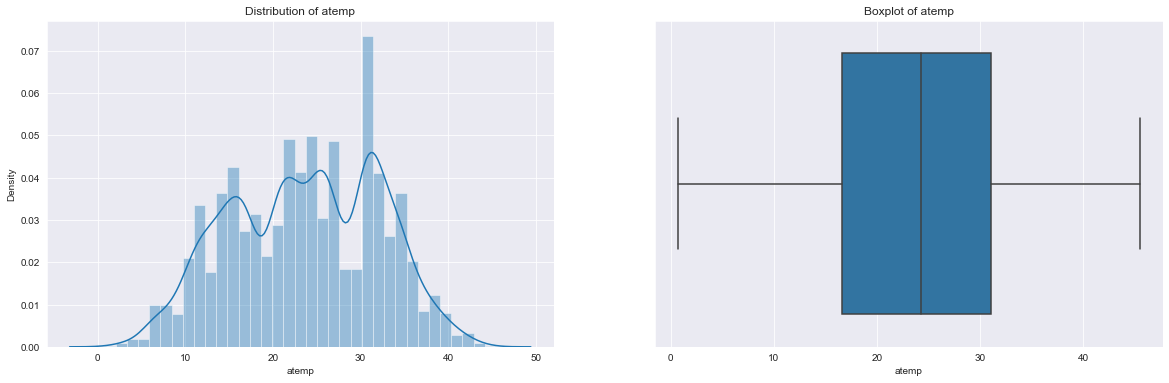

In [15]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['atemp'],ax=axes[0]).set(title='Distribution of atemp')
sns.boxplot(df['atemp'],ax=axes[1]).set(title='Boxplot of atemp')
plt.show()

In [16]:
df.head(1)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01  spring  not_holiday  not_working   clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

### humidity:

In [17]:
print('The mean of humidity : ',np.round(df['humidity'].mean()))
print('The median of humidity : ',df['humidity'].median())
print('The variance of humidity : ',np.round(np.var(df['humidity']),2))
print('The standard deviation of humidity : ',np.round(np.std(df['humidity']),2))

The mean of humidity :  62.0
The median of humidity :  62.0
The variance of humidity :  370.34
The standard deviation of humidity :  19.24


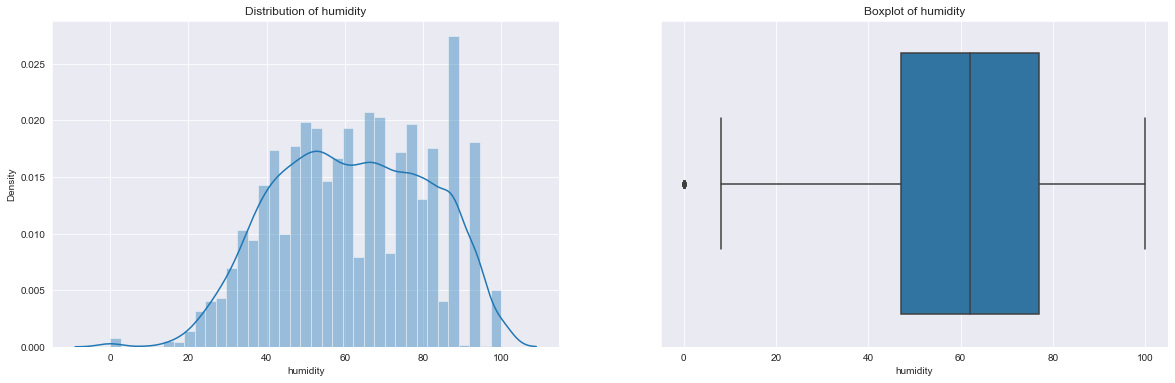

In [18]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['humidity'],ax=axes[0]).set(title='Distribution of humidity')
sns.boxplot(df['humidity'],ax=axes[1]).set(title='Boxplot of humidity')
plt.show()

### windspeed

In [19]:
print('The mean of windspeed : ',np.round(df['windspeed'].mean()))
print('The median of windspeed : ',df['windspeed'].median())
print('The variance of windspeed : ',np.round(np.var(df['windspeed']),2))
print('The standard deviation of windspeed : ',np.round(np.std(df['windspeed']),2))

The mean of windspeed :  13.0
The median of windspeed :  12.998
The variance of windspeed :  66.65
The standard deviation of windspeed :  8.16


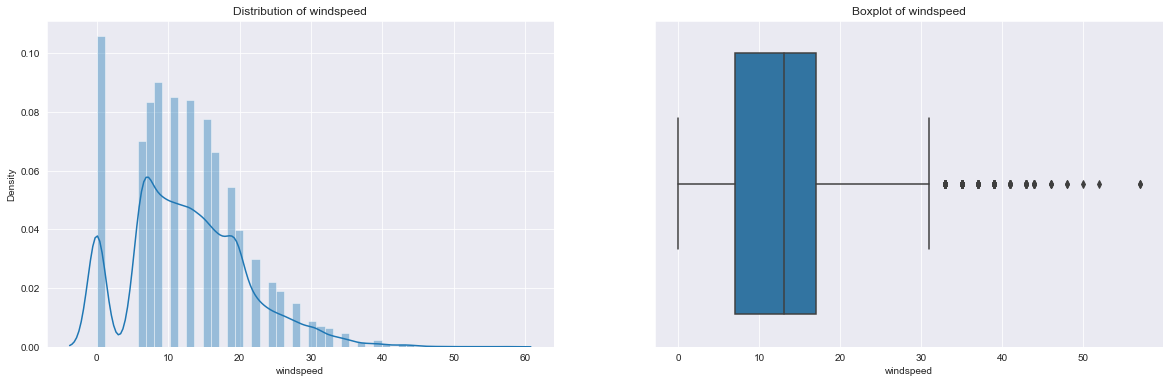

In [20]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['windspeed'],ax=axes[0]).set(title='Distribution of windspeed')
sns.boxplot(df['windspeed'],ax=axes[1]).set(title='Boxplot of windspeed')
plt.show()

### casual

In [21]:
print('The mean of casual : ',np.round(df['casual'].mean()))
print('The median of casual : ',df['casual'].median())
print('The variance of casual : ',np.round(np.var(df['casual']),2))
print('The standard deviation of casual : ',np.round(np.std(df['casual']),2))

The mean of casual :  36.0
The median of casual :  17.0
The variance of casual :  2495.82
The standard deviation of casual :  49.96


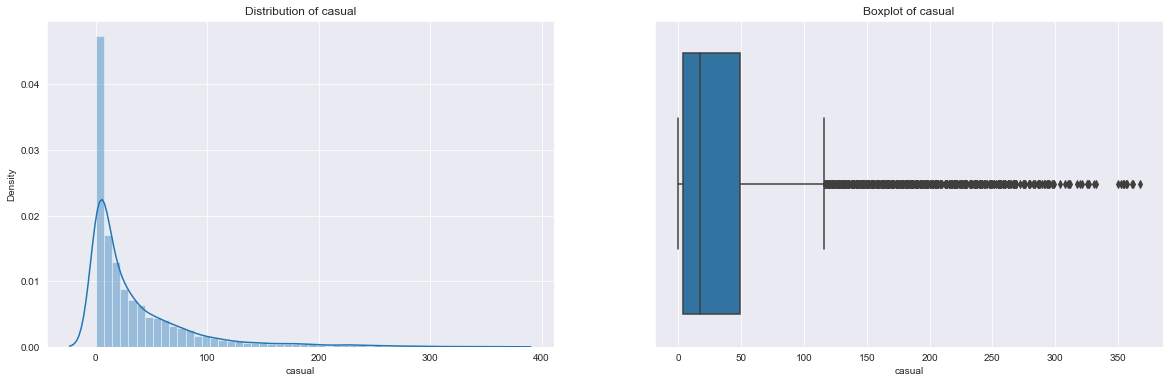

In [22]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['casual'],ax=axes[0]).set(title='Distribution of casual')
sns.boxplot(df['casual'],ax=axes[1]).set(title='Boxplot of casual')
plt.show()

### registered

In [23]:
print('The mean of registered : ',np.round(df['registered'].mean()))
print('The median of registered : ',df['registered'].median())
print('The variance of registered : ',np.round(np.var(df['registered']),2))
print('The standard deviation of registered : ',np.round(np.std(df['registered']),2))

The mean of registered :  156.0
The median of registered :  118.0
The variance of registered :  22810.69
The standard deviation of registered :  151.03


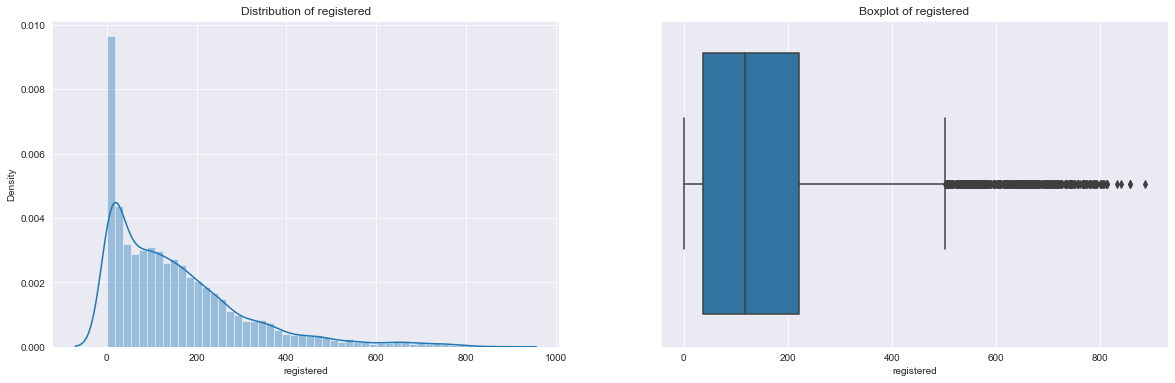

In [24]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['registered'],ax=axes[0]).set(title='Distribution of registered')
sns.boxplot(df['registered'],ax=axes[1]).set(title='Boxplot of registered')
plt.show()

### count

In [25]:
print('The mean of count : ',np.round(df['count'].mean()))
print('The median of count : ',df['count'].median())
print('The variance of count : ',np.round(np.var(df['count']),2))
print('The standard deviation of count : ',np.round(np.std(df['count']),2))

The mean of count :  192.0
The median of count :  145.0
The variance of count :  32810.3
The standard deviation of count :  181.14


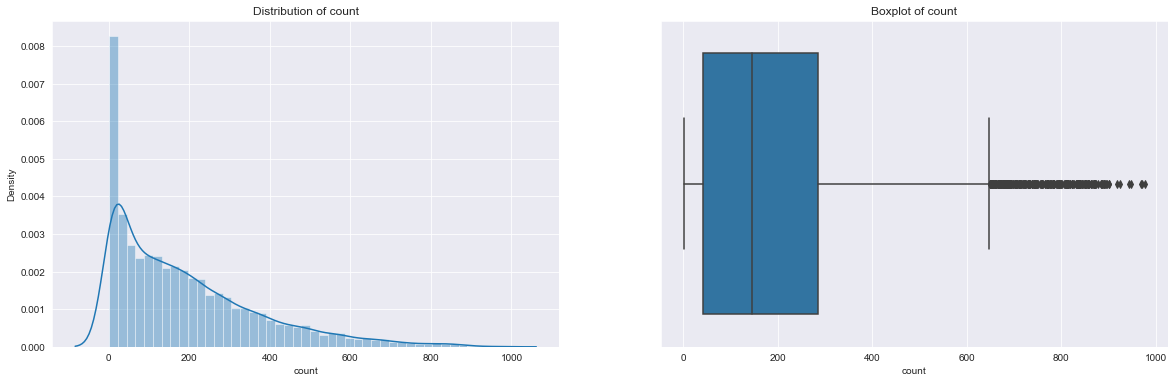

In [26]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df['count'],ax=axes[0]).set(title='Distribution of count')
sns.boxplot(df['count'],ax=axes[1]).set(title='Boxplot of count')
plt.show()

## <span style='color:red '> Observation of Uni-variate Analysis :-</span>

> 1. <b>'team' feature :</b> The plot almost follows gaussian dist and from the boxplot we can obseve there's not outliers.

> 2. <b>'atemp' feature :</b> mean and median of this feature are approx 24 showing there's no outliers in our feature.

> 3. <b>'humidity' feature :</b> mean and median of this feature are 62 but from boxplot we can observe one outlier and plot is close to gaussian dist.

> 4. <b>'windspeed' feature :</b> mean and median are is approx 13 and from boxplot we can see it has many outliers.

> 5. <b>'casua;' feature :</b> There's alot of differnce in mean and median and from boxplot we can see there's alot of outliers and from its density plot we can see that it follows 'pareto' dist.

> 6. <b>'registered' feature :</b> There's alot of difference in mean and median and again it has some outliers also and from its density plot we can see that it has 'pareto' dist.

> 7. <b>'count' feature (target feature) :</b> There's alot of outliers here too and it also follows some sort of 'pareto' dist.

## 1.3 Bi-Variate :-

> Here we will compare which all feature is correlated to the count(rental bikes) ie. of target feature

In [215]:
df.groupby('season')['count'].nunique()

season
fall       662
spring     446
summser    665
winter     619
Name: count, dtype: int64

### 1.3.1 Bi variate analysis of categorical features:

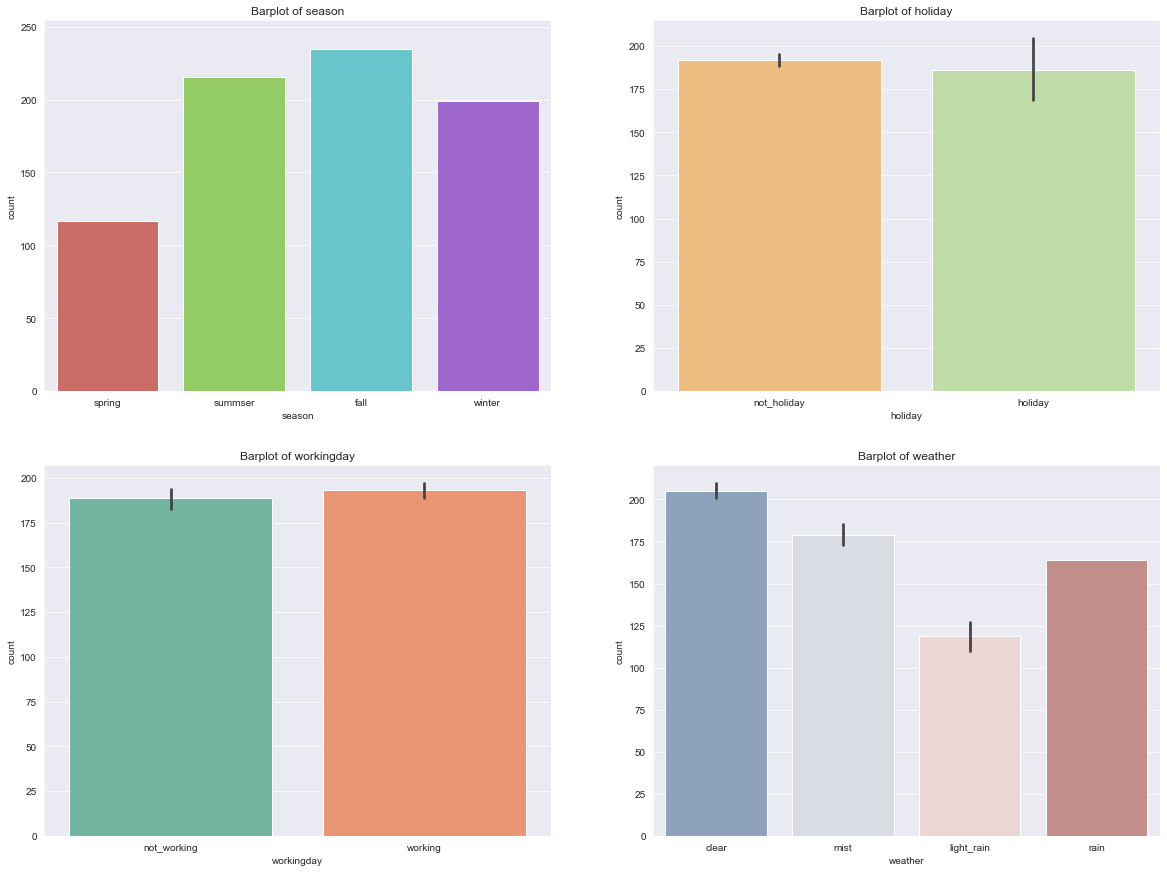

In [225]:
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.barplot(data = df,x='season',y='count',errwidth=0,palette = 'hls',ax=axes[0,0]).set(title='Barplot of season')
sns.barplot(data=df,x='holiday',y='count',palette='Spectral',ax=axes[0,1]).set(title='Barplot of holiday')
sns.barplot(data=df,x='workingday',y='count',palette = 'Set2',ax=axes[1,0]).set(title='Barplot of workingday')
sns.barplot(data=df,x='weather',y='count',palette = 'vlag',ax=axes[1,1]).set(title='Barplot of weather')
plt.show()

## Observation :-

> 1. Barplot of season shows that the fall followed by summer have maximum number of counts.
> 2. Barplot of holiday shows that both holiday and not holiday have approx similar counts.
> 3. 
> 4.

### 1.3.2 Bi variate analysis of Numerical features:

In [30]:
df.head(2)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

## Note:
We have 6 numerical features and we need to find the relationship of these numerical features with respect to count:
> 1. temp <br>
> 2. atemp<br>
> 3. humidity<br>
> 4. windspeed<br>
> 5. casual<br>
> 6. registered

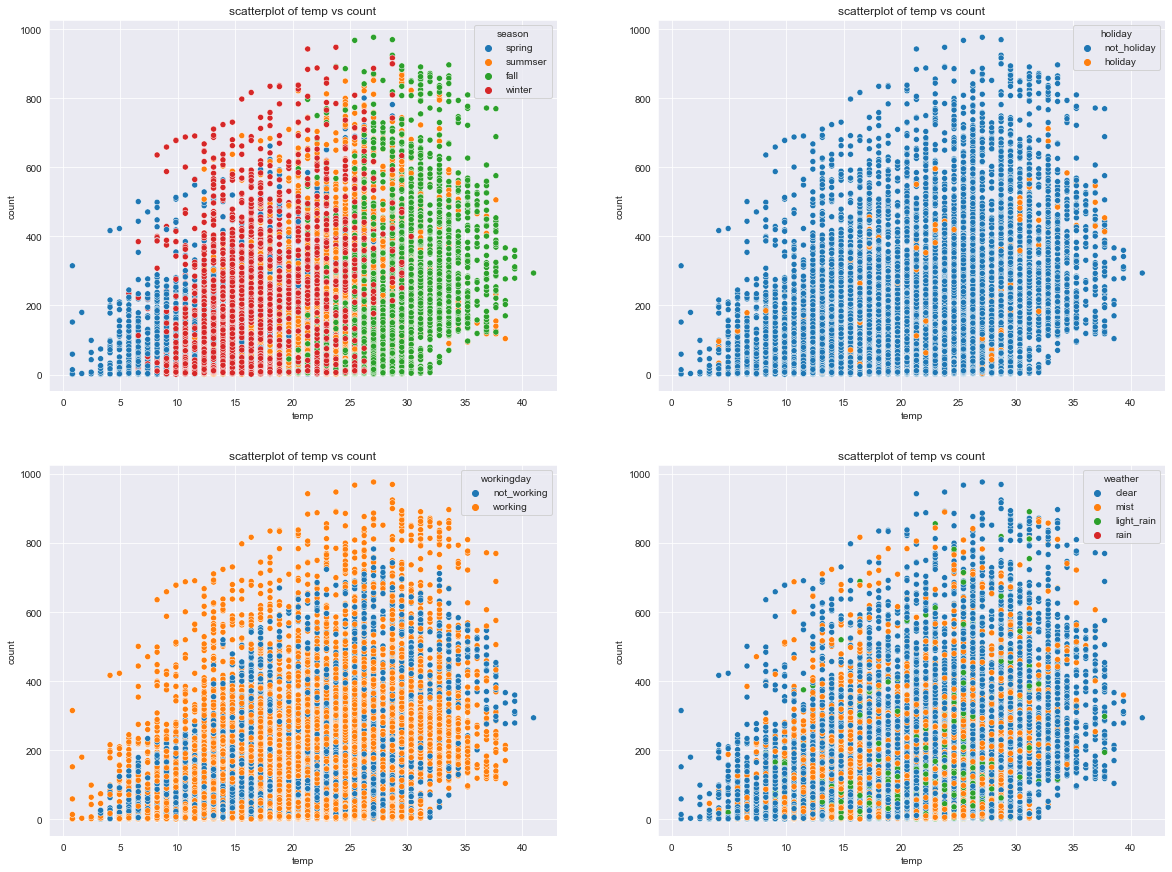

In [31]:
# humidity vs count plus considering categorical features also
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data = df,x='temp',y='count',hue='season',ax=axes[0,0]).set(title='scatterplot of temp vs count')
sns.scatterplot(data=df,x='temp',y='count',hue='holiday',ax=axes[0,1]).set(title='scatterplot of temp vs count')
sns.scatterplot(data=df,x='temp',y='count',hue='workingday',ax=axes[1,0]).set(title='scatterplot of temp vs count')
sns.scatterplot(data=df,x='temp',y='count',hue='weather',ax=axes[1,1]).set(title='scatterplot of temp vs count')
plt.show()

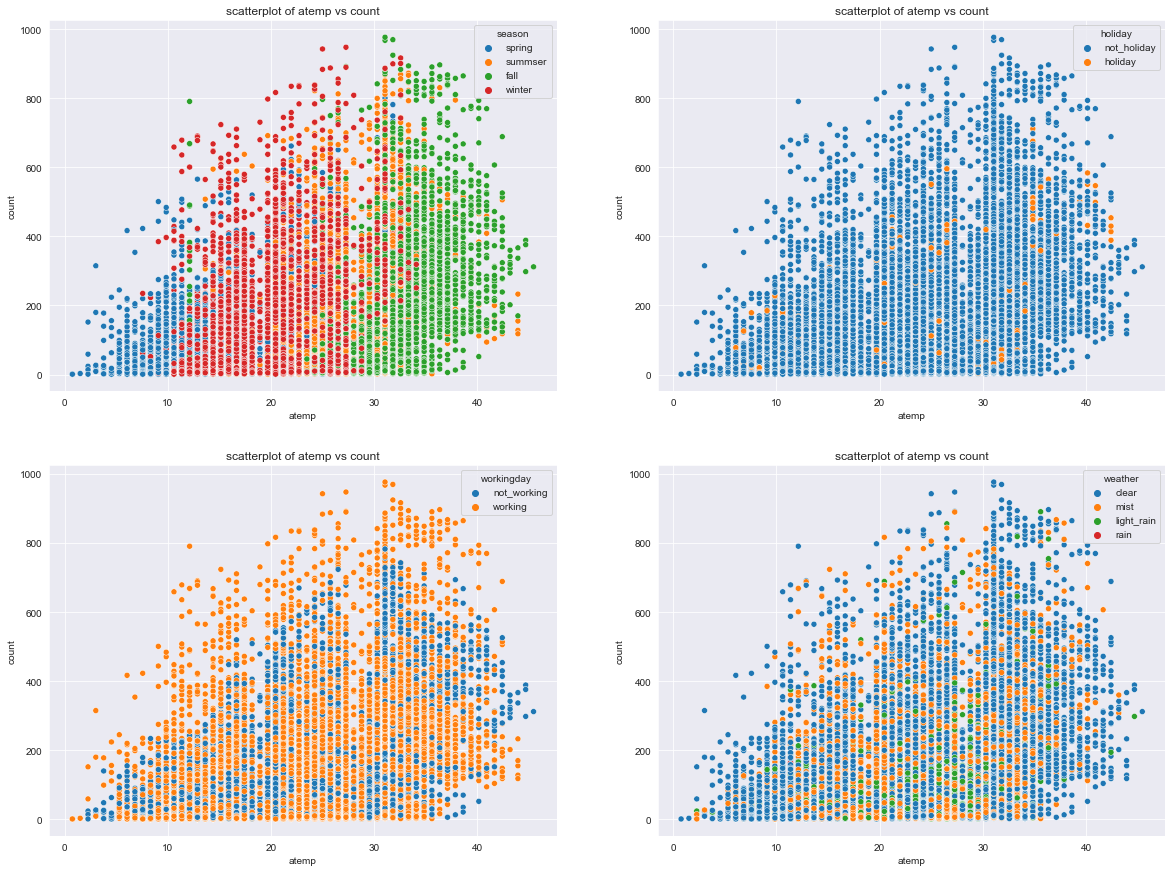

In [32]:
# humidity vs count plus considering categorical features also
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data = df,x='atemp',y='count',hue='season',ax=axes[0,0]).set(title='scatterplot of atemp vs count')
sns.scatterplot(data=df,x='atemp',y='count',hue='holiday',ax=axes[0,1]).set(title='scatterplot of atemp vs count')
sns.scatterplot(data=df,x='atemp',y='count',hue='workingday',ax=axes[1,0]).set(title='scatterplot of atemp vs count')
sns.scatterplot(data=df,x='atemp',y='count',hue='weather',ax=axes[1,1]).set(title='scatterplot of atemp vs count')
plt.show()

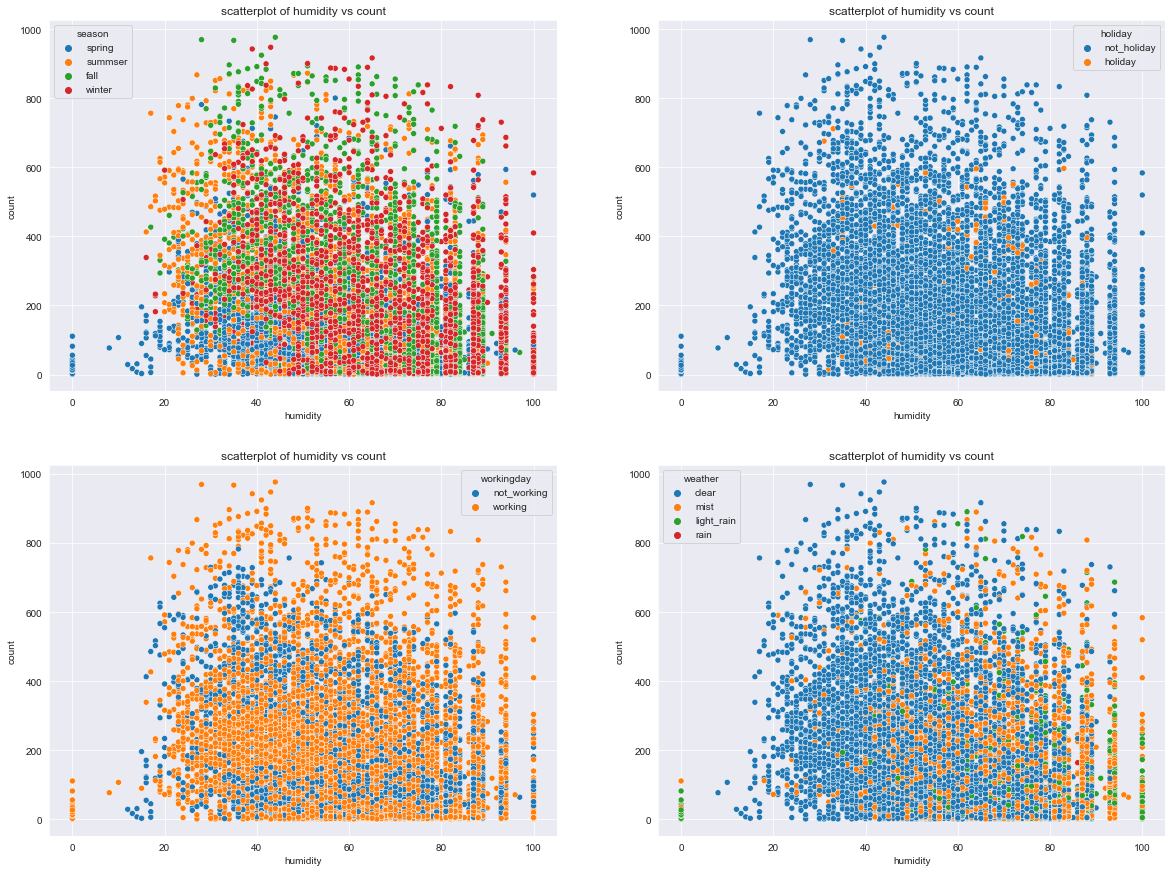

In [33]:
# humidity vs count plus considering categorical features also
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data = df,x='humidity',y='count',hue='season',ax=axes[0,0]).set(title='scatterplot of humidity vs count')
sns.scatterplot(data=df,x='humidity',y='count',hue='holiday',ax=axes[0,1]).set(title='scatterplot of humidity vs count')
sns.scatterplot(data=df,x='humidity',y='count',hue='workingday',ax=axes[1,0]).set(title='scatterplot of humidity vs count')
sns.scatterplot(data=df,x='humidity',y='count',hue='weather',ax=axes[1,1]).set(title='scatterplot of humidity vs count')
plt.show()

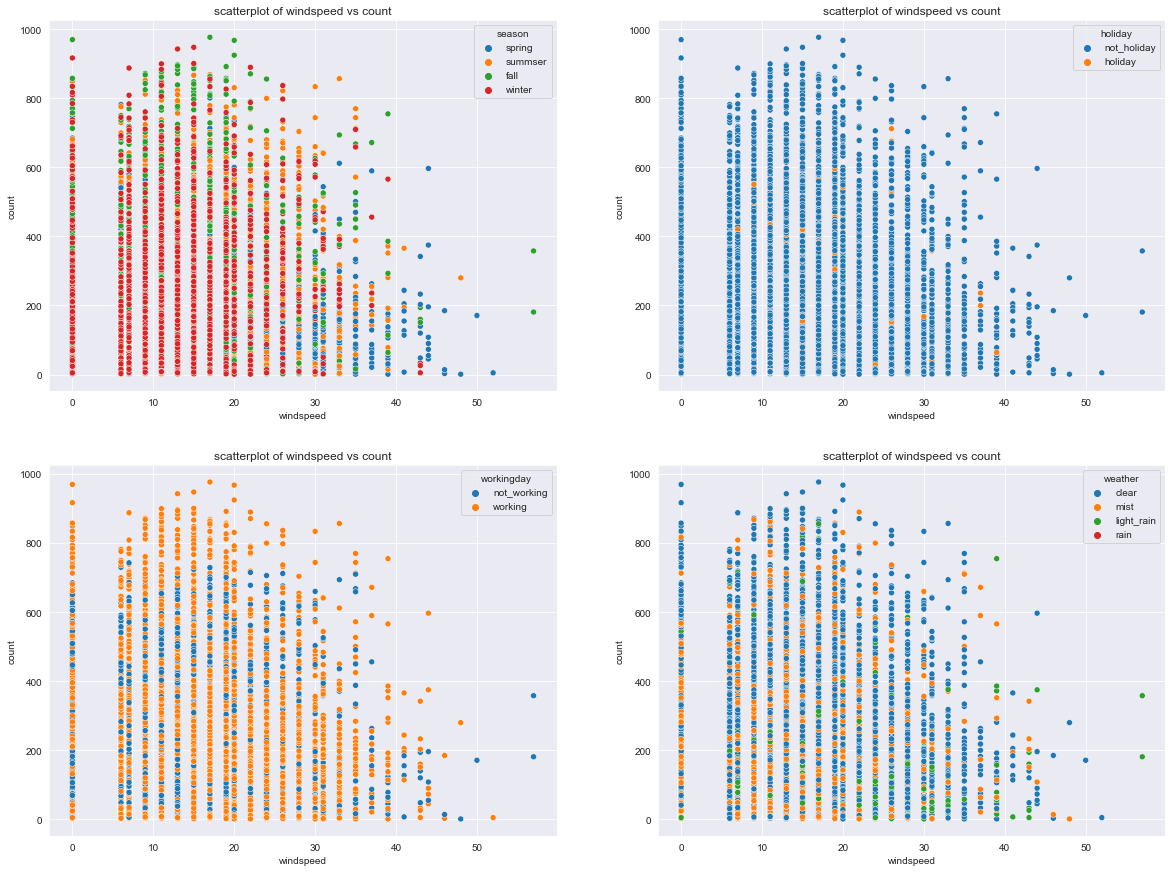

In [34]:
# windspeed vs count plus considering categorical features also
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data = df,x='windspeed',y='count',hue='season',ax=axes[0,0]).set(title='scatterplot of windspeed vs count')
sns.scatterplot(data=df,x='windspeed',y='count',hue='holiday',ax=axes[0,1]).set(title='scatterplot of windspeed vs count')
sns.scatterplot(data=df,x='windspeed',y='count',hue='workingday',ax=axes[1,0]).set(title='scatterplot of windspeed vs count')
sns.scatterplot(data=df,x='windspeed',y='count',hue='weather',ax=axes[1,1]).set(title='scatterplot of windspeed vs count')
plt.show()

In [35]:
df.head(2)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

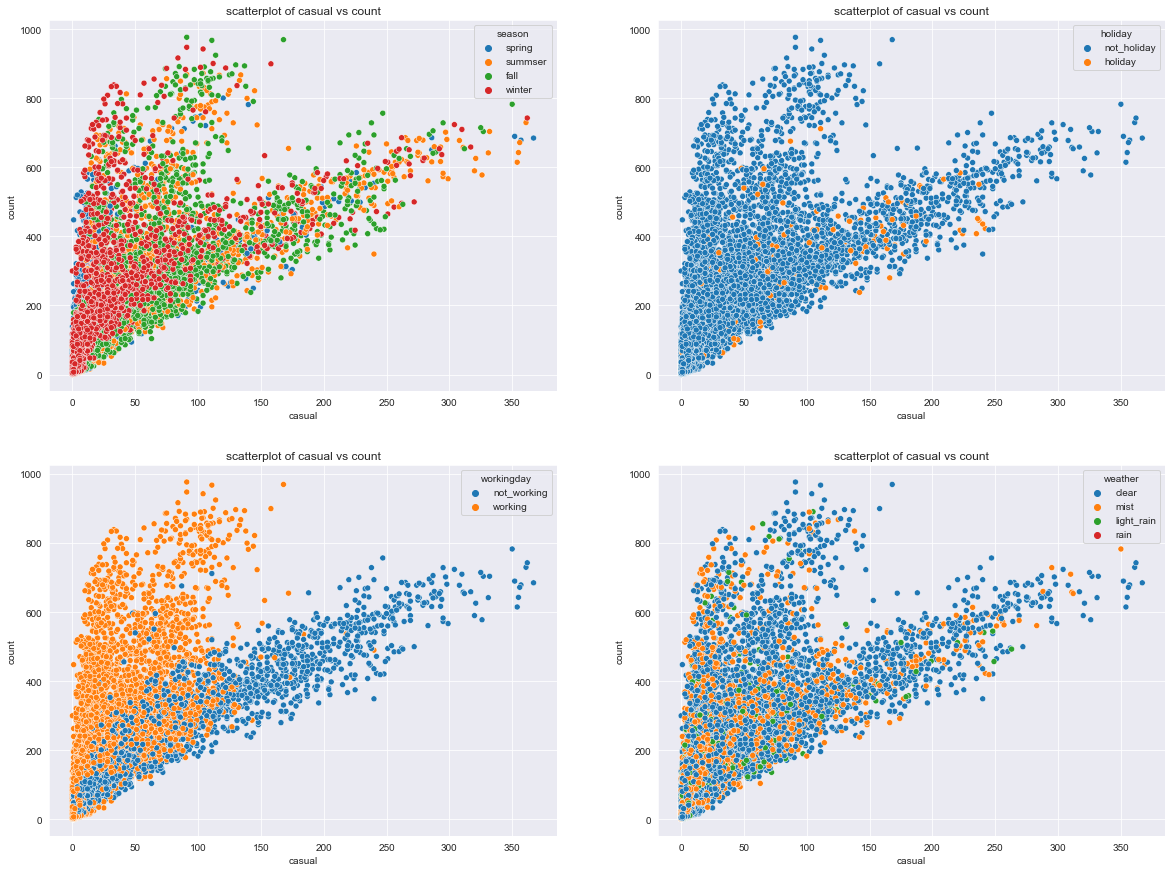

In [36]:
# casual vs count plus considering categorical features also
#plotting
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.scatterplot(data = df,x='casual',y='count',hue='season',ax=axes[0,0]).set(title='scatterplot of casual vs count')
sns.scatterplot(data=df,x='casual',y='count',hue='holiday',ax=axes[0,1]).set(title='scatterplot of casual vs count')
sns.scatterplot(data=df,x='casual',y='count',hue='workingday',ax=axes[1,0]).set(title='scatterplot of casual vs count')
sns.scatterplot(data=df,x='casual',y='count',hue='weather',ax=axes[1,1]).set(title='scatterplot of casual vs count')
plt.show()

## Pairplot:

In [37]:
df.corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

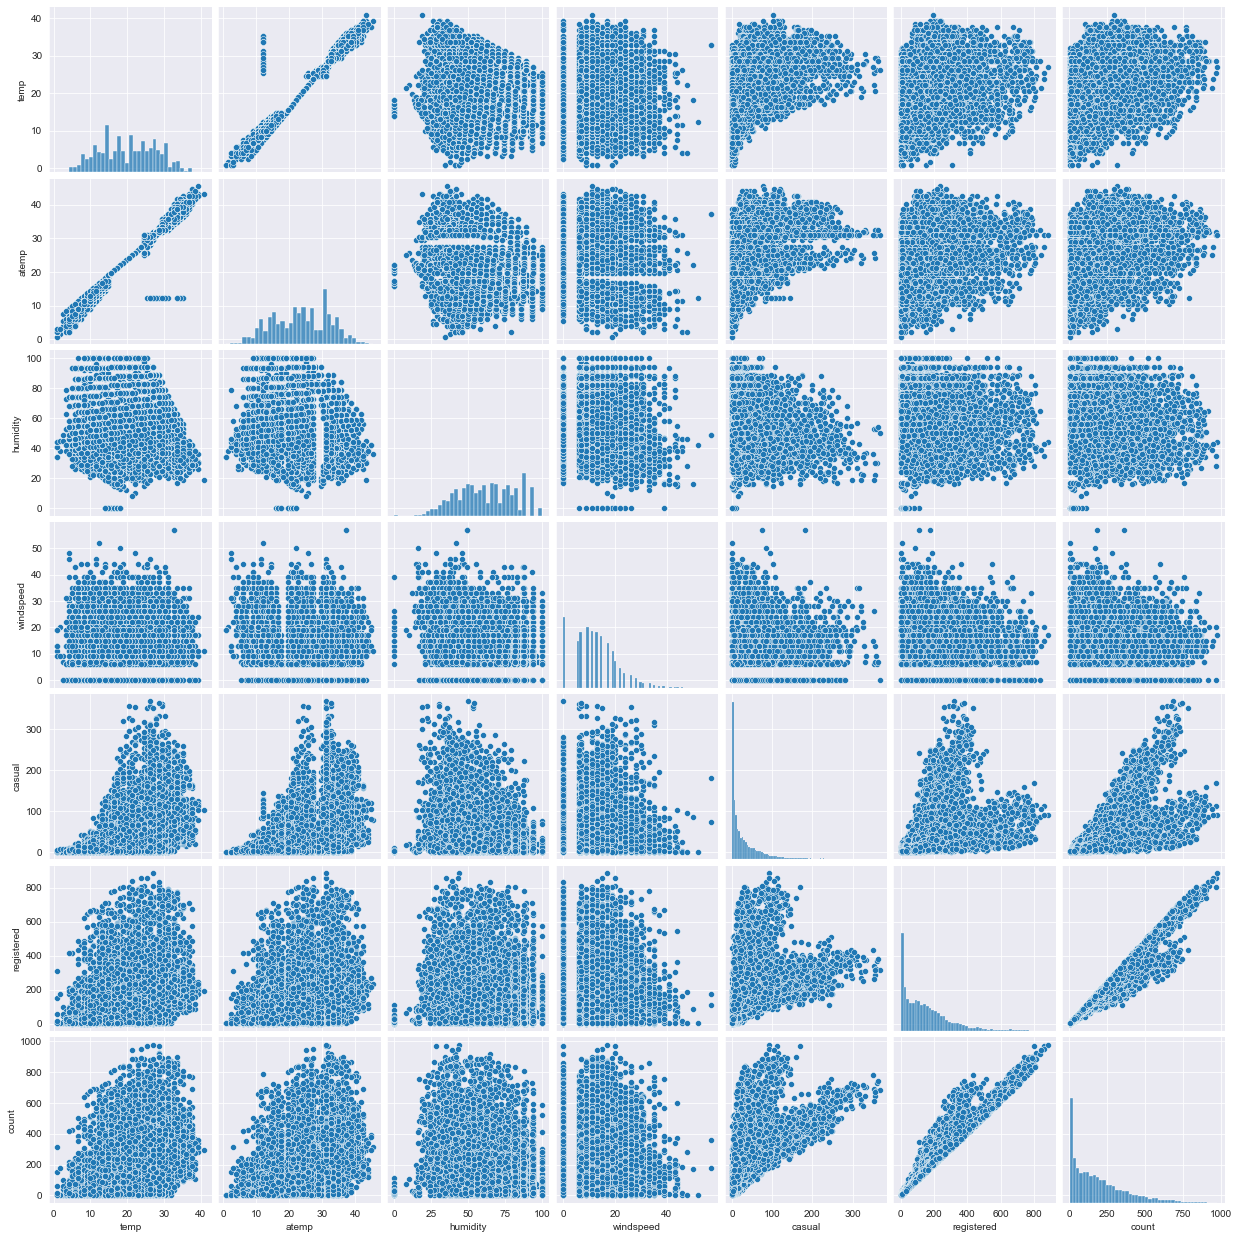

In [38]:
sns.pairplot(df)
plt.show()

## Heatmap:

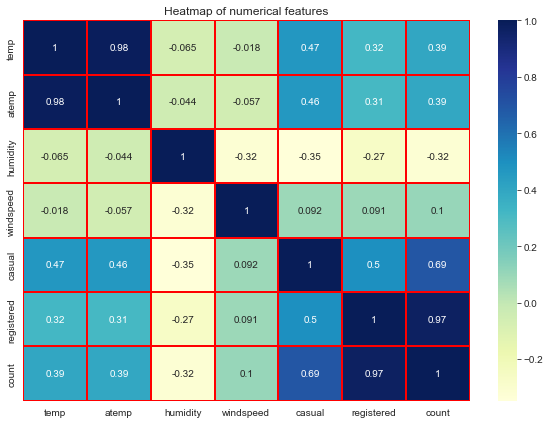

In [39]:
fig, axes = plt.subplots(1, 1,figsize=(10,7))
sns.heatmap(data=df.corr(),cmap="YlGnBu",linewidth=.1,linecolor="red",annot=True).set(title='Heatmap of numerical features')
plt.show()

# 2. Hypothesis Testing

## 2.1 Two-Sample T-Test :-
> 1. Check if working day have any effect on on the number of electric cyles rented(count feature)
> 2. We have two categories in workingday ie not_working and working.
> 3. We will perform 2 sample T test using this

### The following steps are followed in our testing:-

> <b>1. Test Statistic</b> = We considering workingday and its corresponding count or rented bikes 

> <b>2. Null Hypothesis(h0)</b> = electric cyles on working and non working days have no difference

> <b>3. Alternative hypothesis</b> = electric cyles on working and non working days have  difference

> <b>4. p-value/significance level</b> = we considering 5% as our critical value.

In [54]:
not_working = df[df['workingday']=='not_working']
working = df[df['workingday']=='working']

## 2.1.1 Checking the following statistical measures for not_working and working :-



### 2.1.1.1  Analysis of variance using Lavene Test
> 1. Null Hypothesis : The variance of two groups are similar
> 2. Alternative hypothesis : The variance of two groups are not similar

In [65]:
from scipy.stats import levene
levene_ans = levene(not_working['count'],working['count'])
p_value = 0.05
if levene_ans.pvalue < p_value:
    print('Reject null hypothese having p value : ',levene_ans.pvalue)
else:
    print('Accept null hypothesis having p value : ',levene_ans.pvalue)

Accept null hypothesis having p value :  0.9437823280916695


### 2.1.1.2  Analysis of median using median using Krushkal Test
> 1. Null Hypothesis : The median of two groups are similar
> 2. Alternative hypothesis : The median of two groups are not similar

In [66]:
from scipy.stats import kruskal
kruskal_ans = kruskal(not_working['count'],working['count'])
p_value = 0.05
if kruskal_ans.pvalue < p_value:
    print('Reject null hypothese having p value : ',kruskal_ans.pvalue)
else:
    print('Accept null hypothesis having p value : ',kruskal_ans.pvalue)

Accept null hypothesis having p value :  0.9679113872727798


### 2.1.1.3  Checking whether both are normally distributed or not

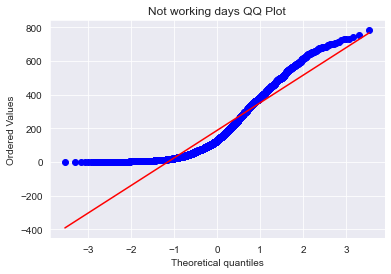

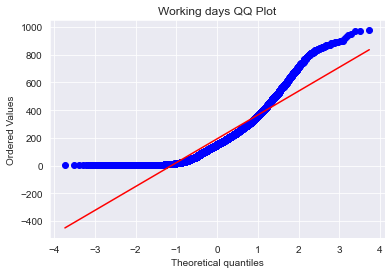

In [94]:
stats.probplot(not_working['count'], dist="norm", plot=plt)
plt.title('Not working days QQ Plot')
plt.show()
stats.probplot(working['count'], dist="norm", plot=plt)
plt.title('Working days QQ Plot')
plt.show()

## <span style='color:red '> Performing Two Sample T Test</span>

<span style='color:blue '>
    
> <b>Null hypothesis</b> : The working and not working rental bikes are same
    
> <b>Alternative Hypothesis</b> : The working and not working rental bikes are different.</span>

In [95]:
from scipy.stats import ttest_ind
ttest_ind_ans = ttest_ind(not_working['count'],working['count'])
p_value = 0.05
if ttest_ind_ans.pvalue < p_value:
    print('Reject null hypothese having p value : ',ttest_ind_ans.pvalue)
else:
    print('Accept null hypothesis having p value : ',ttest_ind_ans.pvalue)

Accept null hypothesis having p value :  0.22644804226361348


## 2.2 ANOVA Test :-
> 1. Check if number of rented cyles are same or different in weather
> 2. Check if number of rented cyles are same or different in season
> 3. We will perform ANOVA Test

## <span style='color:red '> Basic Assumptions for ANOVA Test:</span>

> 1. The data we testing should be gaussian dist and we will check this using QQ Plot :

> 2. Your data should be independent of the each other.

> 3. There should not be significant variance in your data.

### 2.2.1 Checking whether our data is normally distributed using QQ Plot:-

In [98]:
df.head(2)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [100]:
#seperating the weather feature into categories
df['weather'].value_counts()

clear         7192
mist          2834
light_rain     859
rain             1
Name: weather, dtype: int64

In [115]:
clear_weather = df.loc[df['weather']=='clear']
mist_weather = df.loc[df['weather']=='mist']
light_rain_weather = df.loc[df['weather']=='light_rain']
rain_weather = df.loc[df['weather']=='rain']

Text(0.5, 1.0, 'QQ Plot of rain_weather')

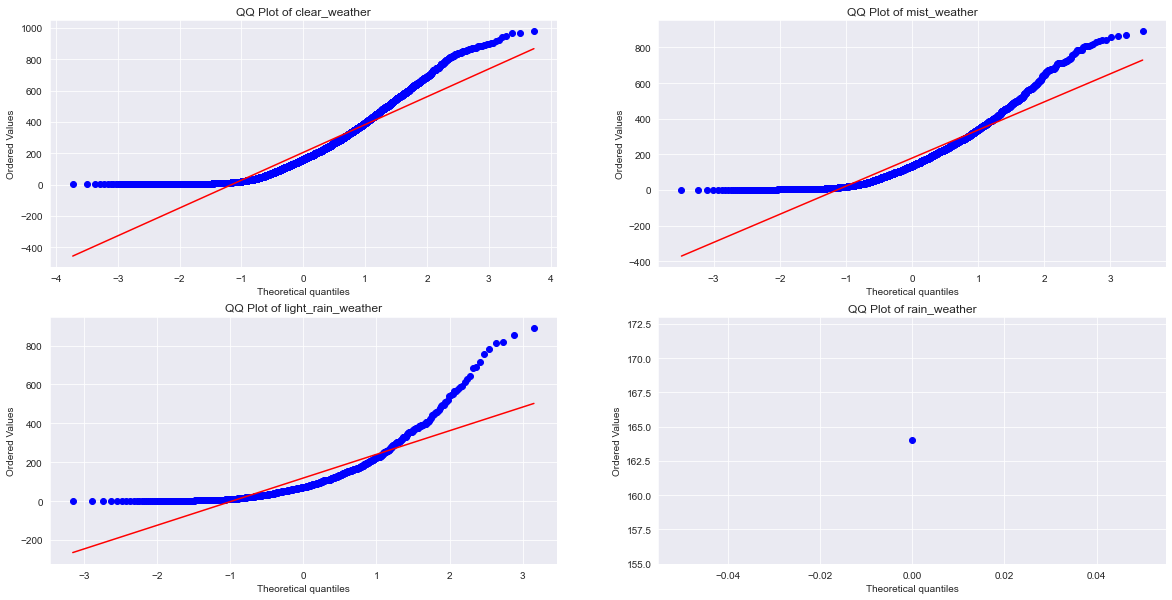

In [182]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(221)
res = stats.probplot(clear_weather['count'],dist="norm", plot=plt)
plt.title('QQ Plot of clear_weather')

ax2 = plt.subplot(222)
res = stats.probplot(mist_weather['count'],dist="norm", plot=plt)
plt.title('QQ Plot of mist_weather')

ax3 = plt.subplot(223)
res = stats.probplot(light_rain_weather['count'],dist="norm", plot=plt)
plt.title('QQ Plot of light_rain_weather')

ax4 = plt.subplot(224)
res = stats.probplot(rain_weather['count'],dist="norm", plot=plt)
plt.title('QQ Plot of rain_weather')

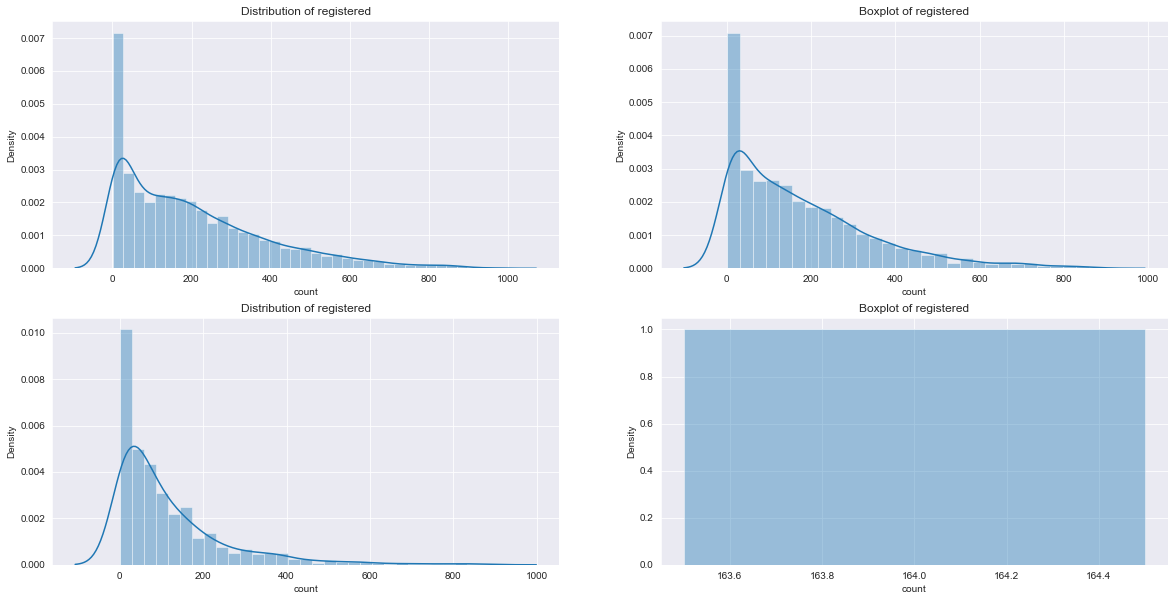

In [183]:
# here plotting the distribution of weather categories:-
fig, axes = plt.subplots(2, 2,figsize=(20,10))
sns.distplot(clear_weather['count'],ax=axes[0,0]).set(title='Distribution of registered')
sns.distplot(mist_weather['count'],ax=axes[0,1]).set(title='Boxplot of registered')
sns.distplot(light_rain_weather['count'],ax=axes[1,0]).set(title='Distribution of registered')
sns.distplot(rain_weather['count'],ax=axes[1,1]).set(title='Boxplot of registered')
plt.show()


## Observation:-
#### 1. Three of the above plots are following some sort of pareto distribution.
#### 2. Here we can apply BOX-COX transformation and then our data will be converted into gaussian dist.
#### 3. After we got to know that our data is gaussian dist then we can apply ANOVA Test.

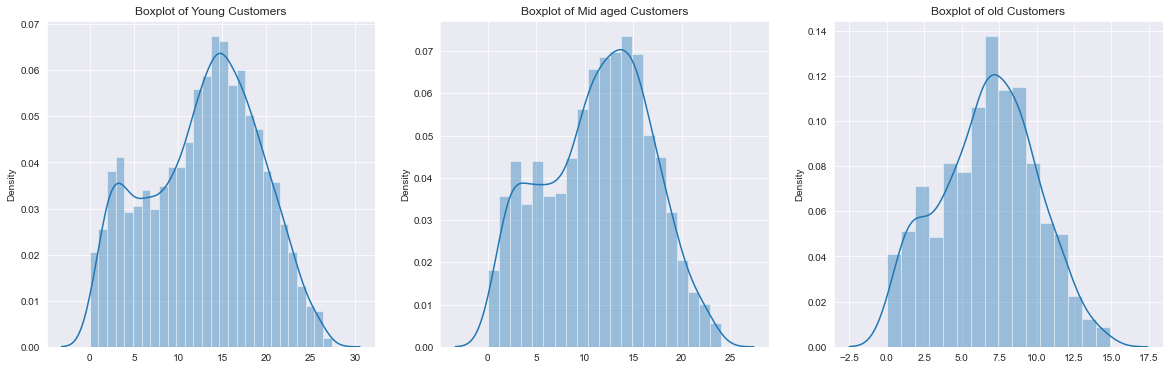

In [191]:
clear_bx, clear_l = stats.boxcox(clear_weather['count'])
mist_bx, mist_l = stats.boxcox(mist_weather['count'])
light_bx, light_l = stats.boxcox(light_rain_weather['count'])
# plotting

fig, axes = plt.subplots(1, 3,figsize=(20,6))
sns.distplot(clear_bx,ax=axes[0]).set(title='Boxplot of Young Customers')
sns.distplot(mist_bx,ax=axes[1]).set(title='Boxplot of Mid aged Customers')
sns.distplot(light_bx,ax=axes[2]).set(title='Boxplot of old Customers')
plt.show()

Text(0.5, 1.0, 'QQ Plot of light_rain_weather')

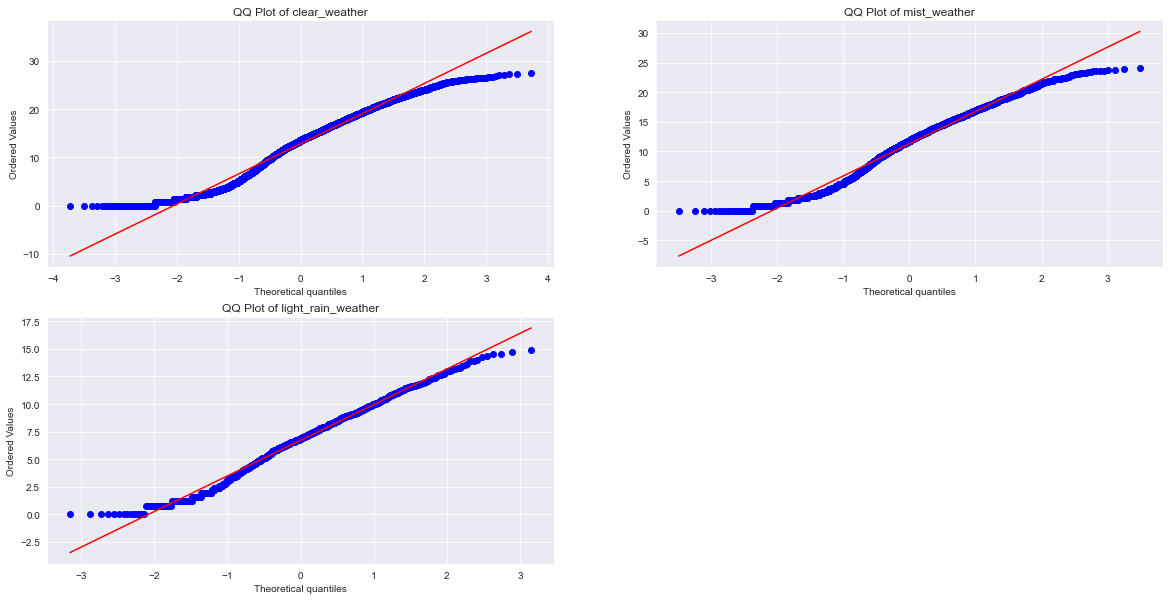

In [193]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(221)
res = stats.probplot(clear_bx,dist="norm", plot=plt)
plt.title('QQ Plot of clear_weather')

ax2 = plt.subplot(222)
res = stats.probplot(mist_bx,dist="norm", plot=plt)
plt.title('QQ Plot of mist_weather')

ax3 = plt.subplot(223)
res = stats.probplot(light_bx,dist="norm", plot=plt)
plt.title('QQ Plot of light_rain_weather')

## <span style='color:green '> Observation of BOX-COX : :</span> 

#### We can see the three categories are almost nornmally distributed now but to do ANOVA test, we need to know whether all three have same variance or not.

### Checking whether these three have same variance or not using Levene Test :-

###  Analysis of variance using Lavene Test
> 1. Null Hypothesis : The variance of three groups are similar
> 2. Alternative hypothesis : The variance of three groups are not similar

In [198]:
from scipy.stats import levene
levene_ans = levene(clear_bx,mist_bx,light_bx)
p_value = 0.05
if levene_ans.pvalue < p_value:
    print('Reject null hypothese having p value : ',levene_ans.pvalue)
else:
    print('Accept null hypothesis having p value : ',levene_ans.pvalue)

Reject null hypothese having p value :  1.0502360215620662e-101


##  <span style='color:green '> Observation : :</span> 

### <span style='color:red '> Failed to perform ANOVA Test since variance of all three groups are not same : :</span> 

## 2.3 Chi-square Test :-
> 1. Check if the weather is dependent on season or not.
> 2. We will make a pandas cross tab where the count(rental bikes) will be corresponding to the categories.


In [199]:
df.head(2)

datetime  season      holiday   workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring  not_holiday  not_working   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring  not_holiday  not_working   clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [210]:
print('Season categories : \n',df['season'].value_counts())
print('-'*100)
print('Weather categories :\n',df['weather'].value_counts())

Season categories : 
 winter     2734
summser    2733
fall       2733
spring     2686
Name: season, dtype: int64
----------------------------------------------------------------------------------------------------
Weather categories :
 clear         7192
mist          2834
light_rain     859
rain             1
Name: weather, dtype: int64


In [211]:
cross_tab = pd.crosstab(df['season'],df['weather'])
cross_tab

weather  clear  light_rain  mist  rain
season                                
fall      1930         199   604     0
spring    1759         211   715     1
summser   1801         224   708     0
winter    1702         225   807     0

## The following will be our hypothesis:
> 1. Null hypothesis : weather and season have no affect on rental bikes.

> 2. Alternative hypothesis : weather and season have affect on rental bikes.

In [214]:
from scipy.stats import chi2_contingency
a,pvalue,c,d = chi2_contingency(cross_tab)
significance = 0.05
if pvalue < significance:
    print('Reject null hypothesis having p value : ',pvalue)
else:
    print('Accept null hypothesis having p value : ',pvalue)

Reject null hypothesis having p value :  1.5499250736864862e-07
